### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Datasets

In [3]:
X = pd.read_csv('Logistic_X_Train.csv').values
Y = pd.read_csv('Logistic_Y_Train.csv').values
print(X.shape)
print(Y.shape)

(3000, 3)
(3000, 1)


In [4]:
print(X[:4,:])

[[-1.23937466  0.74910149 -0.52851491]
 [-1.03607028  0.80143631 -1.28371152]
 [-0.61557914  1.57952053 -1.39192706]
 [ 1.33597757  1.34865062  1.43356425]]


### Algorithm

In [28]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def hypothesis(x,theta,bias):
    hx = np.dot(x,theta) + bias
    return sigmoid(hx)

def error(x,theta,bias,y):
    m = x.shape[0]
    total_err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],theta,bias)
        total_err += y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)
        
    return -(total_err)/m


def gradient(x,theta,bias,y):
    m = x.shape[0]
    grad_theta = np.zeros(theta.shape)
    grad_bias = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],theta,bias)
        grad_theta += (y[i] - hx)*x[i]
        grad_bias += y[i] - hx
        
    return grad_theta/m,grad_bias/m

def GradientAscent(x,y,theta,bias,learning_rate):
    
    err = error(x,theta,bias,y)
    grad_theta,grad_bias = gradient(x,theta,bias,y)
    theta = theta + learning_rate*grad_theta
    bias += learning_rate*(grad_bias)
    
    return theta,bias,err



In [47]:
theta = 2*np.random.random((X.shape[1],))
bias = 5*np.random.random()
Err = []
for i in range(1200):
    theta,bias,err = GradientAscent(X,Y,theta,bias,0.1)
    Err.append(err)

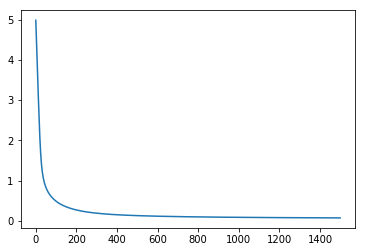

In [53]:
plt.plot(Err)

In [54]:
print(Err[-10:])

[array([0.07133209]), array([0.07131263]), array([0.07129319]), array([0.07127377]), array([0.07125439]), array([0.07123502]), array([0.07121569]), array([0.07119638]), array([0.07117709]), array([0.07115783])]


In [55]:
def predict(x,theta,bias):
    hx = hypothesis(x,theta,bias)
    if hx<0.5:
        return 0
    else:
        return 1

In [56]:
correct = 0
for i in range(X.shape[0]):
    if Y[i] == predict(X[i],theta,bias):
        correct += 1
        
print(correct/X.shape[0])

0.992


In [52]:
for i in range(300):
    theta,bias,err = GradientAscent(X,Y,theta,bias,0.1)
    Err.append(err)

In [63]:
Xt = pd.read_csv('Logistic_X_Test.csv').values
Yt = []
for i in range(Xt.shape[0]):
    Yt.append(predict(Xt[i],theta,bias))
    


In [64]:
df = pd.DataFrame(Yt)
print(df)

     0
0    1
1    1
2    0
3    1
4    1
5    1
6    0
7    1
8    0
9    0
10   0
11   1
12   1
13   1
14   1
15   0
16   1
17   0
18   1
19   0
20   1
21   0
22   1
23   0
24   1
25   1
26   0
27   0
28   0
29   1
..  ..
970  1
971  1
972  0
973  1
974  0
975  0
976  0
977  1
978  0
979  0
980  1
981  0
982  1
983  1
984  0
985  1
986  1
987  0
988  1
989  1
990  0
991  0
992  0
993  1
994  1
995  0
996  0
997  1
998  1
999  0

[1000 rows x 1 columns]


In [66]:
df.to_csv?

In [67]:
df.to_csv('sol.csv',header=['label'],index=False)